In [1]:
# environment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
import tensorflow as tf
from tensorflow import keras

In [2]:
# import data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# check for missing data
missing_train = np.any(np.isnan(x_train)) or np.any(np.isnan(y_train))
missing_test = np.any(np.isnan(x_test)) or np.any(np.isnan(y_test))
print("Missing values in training data:", missing_train)
print("Missing values in testing data:", missing_test)

Missing values in training data: False
Missing values in testing data: False


In [4]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# reshape data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# one-hot encoding
y_train_encoded = np.eye(10)[y_train]
y_test_encoded = np.eye(10)[y_test]

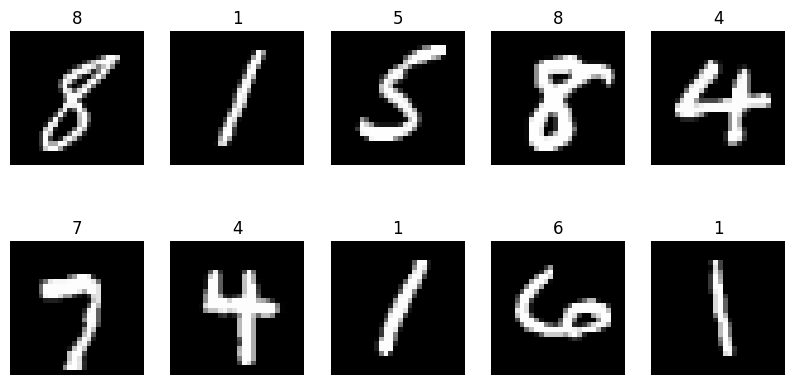

In [5]:
# visualize 10 random numbers
plt.figure(figsize=(10, 5))
for i, index in enumerate(np.random.choice(x_train.shape[0], 10, replace=False)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f'{y_train[index]}')
    plt.axis('off')
plt.show()

In [6]:
# construct model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_encoded, epochs=10, batch_size=64, validation_split=0.1)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy:.4f}')

c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8167 - loss: 0.5665 - val_accuracy: 0.9838 - val_loss: 0.0573
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9671 - loss: 0.1091 - val_accuracy: 0.9870 - val_loss: 0.0447
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9751 - loss: 0.0805 - val_accuracy: 0.9893 - val_loss: 0.0387
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9815 - loss: 0.0622 - val_accuracy: 0.9913 - val_loss: 0.0352
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9830 - loss: 0.0561 - val_accuracy: 0.9907 - val_loss: 0.0367
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9853 - loss: 0.0474 - val_accuracy: 0.9910 - val_loss: 0.0322
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9871 - loss: 0.0420 - val_accuracy: 0.9910 - val_loss: 0.0324
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9875 - loss: 0.0396 - 

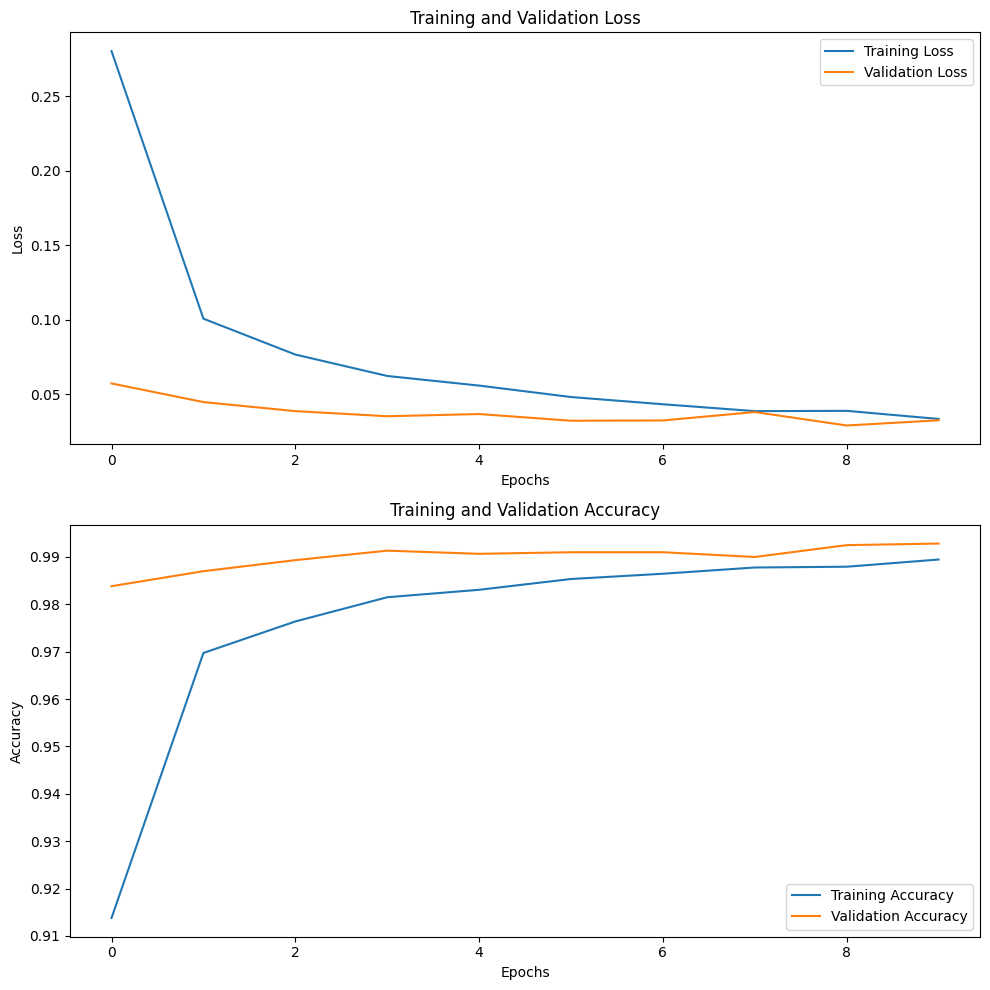

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


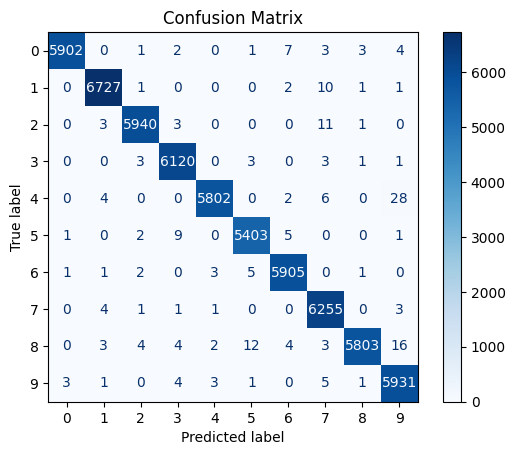

In [8]:
y_val_pred = model.predict(x_train)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_train, y_val_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()